In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
def data_average(preamble, experiment, datasets):
    for i, item in enumerate(datasets):
        item = str(item)
        if len(item) < 5:
            item = (5 -len(item))*'0' + item
        temp = np.loadtxt(preamble + item  + ' - ' + experiment + '.csv', delimiter=',')
        if i != 0:
            prev_y = temp[:,1] + prev_y
        else:
            x_values = temp[:,0]
            prev_y = temp[:,1]
    y_values = prev_y/len(datasets)
    return [x_values, y_values]

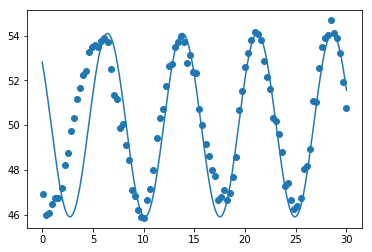

In [3]:
sets = [54,55, 61, 64, 65, 68]
x1 = np.linspace(0,30,1000)
x, y = data_average('/home/qsimexpcontrol/LabRAD/data/Delaystagescan.dir/', 'Delaystagescan', sets)
plt.scatter(x,y)
plt.plot(x1, 4.1*np.sin(0.85*x1 + -3.9) + 50)

In [4]:
def sine_func(t, A, w, phi, offset):
    return A*np.sin(w*t + phi) + offset

<IPython.core.display.Javascript object>


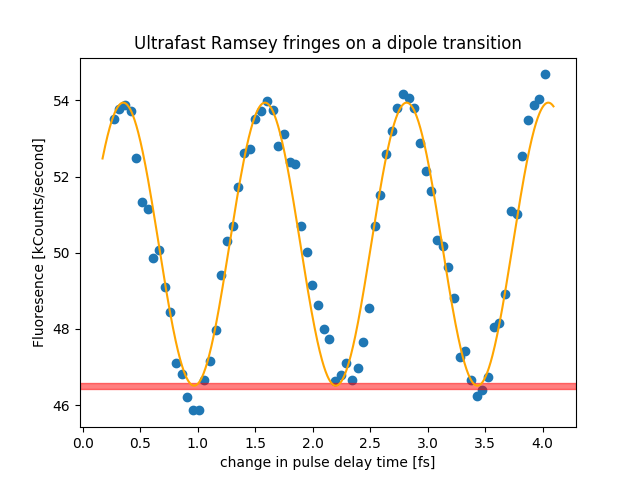

In [20]:
%matplotlib notebook
shifted_x = []
shifted_y = []
x1 = np.linspace(-2,22,1000)
for item in sets:
    temp = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/Delaystagescan.dir/000' + str(item)  + ' - ' + 'Delaystagescan' + '.csv', delimiter=',')
    x = temp[:,0]
    y= temp[:,1]
    sinefit, pcov1 = curve_fit(sine_func, x, y, p0=[-4.66,0.79, -6.7, 49.7])
    shift = sinefit[2] - np.remainder(sinefit[2], 0.302)
    tmp = x + shift
    shifted_x.append(tmp[3:-5])
    shifted_y.append(y[3:-5])

avg_y = np.zeros(92)
for i, item in enumerate(shifted_y):
    avg_y += item
final_x = shifted_x[0][15:]
final_y = avg_y[15:]/6
sinefit, pcov1 = curve_fit(sine_func, final_x, final_y, p0=[-4.66,0.79, -6.7, 49.7])

fig, ax = plt.subplots()
ax.axhspan(46.5 -0.085, 46.5 + 0.085, alpha=0.5, color='red')
plt.scatter(2*((0.616/7.54) *final_x + 0.25), final_y)
plt.plot(((0.616/7.54) * x1 + 0.25)*2, sine_func(x1, sinefit[0], sinefit[1], sinefit[2], sinefit[3]), 'orange')
#plt.plot(((0.616/7.54) * x1 + 0.25)*2, 46.5*np.ones(len(x1)),color='red', linewidth = 20)
plt.ylabel('Fluoresence [kCounts/second]')
plt.xlabel('change in pulse delay time [fs]')
plt.title('Ultrafast Ramsey fringes on a dipole transition')
plt.savefig('/home/qsimexpcontrol/plots/ML_Laser/1JUN2017Ramsey_single_ion.pdf')